![image info](https://ineuron.ai/images/ineuron-logo.png)

# Forest Fire Predictor
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* We need to develop a model that takes into account the detected fires dataset and detects future fires using specific weather reports.
* using Sklearn for pre-processing
* Pandas, Numpy, Matplotlib for csv reading, Data Processing, Data Cleaning and Visualization

## 2) Data Collection.
* The dataset I used comes from UCI on Algerian Forest Fires. 
* Forest fire observations and data from two regions of Algeria are included in this dataset: Bejaia and Sidi Bel-Abbes.
* This dataset spans the period from June 2012 to September 2012. 
* Our project examined the possibility of using Machine Learning algorithms to predict forest fires in these regions based on certain weather features.

### 2.1 Import Data and Required Packages
* Installing Python, PyCharm, Monogodb, Git to Computer.
* Download the source dataset from UCI Repository.
* For Classification algorithm decided to predict the features Classes from the dataset which is Binary classification (fire, not fire).
* For Regression Problem algorithm decided to predict the feature FWI (Fire weather Index) which is 90%+ correlated to Classes Feature.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import pickle
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from pandas_profiling import ProfileReport

**2.2 Download and Import the CSV Data as Pandas DataFrame**

In [5]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [27]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


**EDA**

**Shape of the dataset**

In [11]:
df1.shape

(243, 15)

**Summary of the dataset**

In [12]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243
unique,31,4,1,19,62,18,39,173,165,197,106,173,126,8,2
top,01,08,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,1
freq,8,62,243,29,10,43,133,7,5,5,8,5,12,131,126


**Check Datatypes in the dataset**

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 30.4+ KB


**Data Cleaning**

In [28]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [29]:
df[df.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [30]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [31]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [32]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
237,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
239,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
240,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [33]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [34]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [35]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [36]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


No duplicates data is there in the dataset

In [37]:
#remove 122th column
df1 = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [38]:
df1.shape

(243, 15)

In [39]:
df1[df1.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


Now we dont have any missing data in dataset so we can move to the analysis part.

In [40]:
# List out column names to check 
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Changing the data types into the required data types for the respective features for the analysis

In [42]:
df1[['month', 'day', 'year', 'Temperature',' RH', ' Ws']] = df1[['month', 'day', 'year', 'Temperature',' RH', ' Ws']].astype(int)

In [43]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [44]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [45]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [46]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [47]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [48]:
df1.Classes = df1.Classes.str.strip()

In [49]:
df1["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [50]:
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [51]:
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [52]:
df1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


In [53]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [56]:
df1.to_csv('Algerian_forest_fire_cleaned-data.csv', index=False)

## Define numerical & categorical columns

### Categorical Features

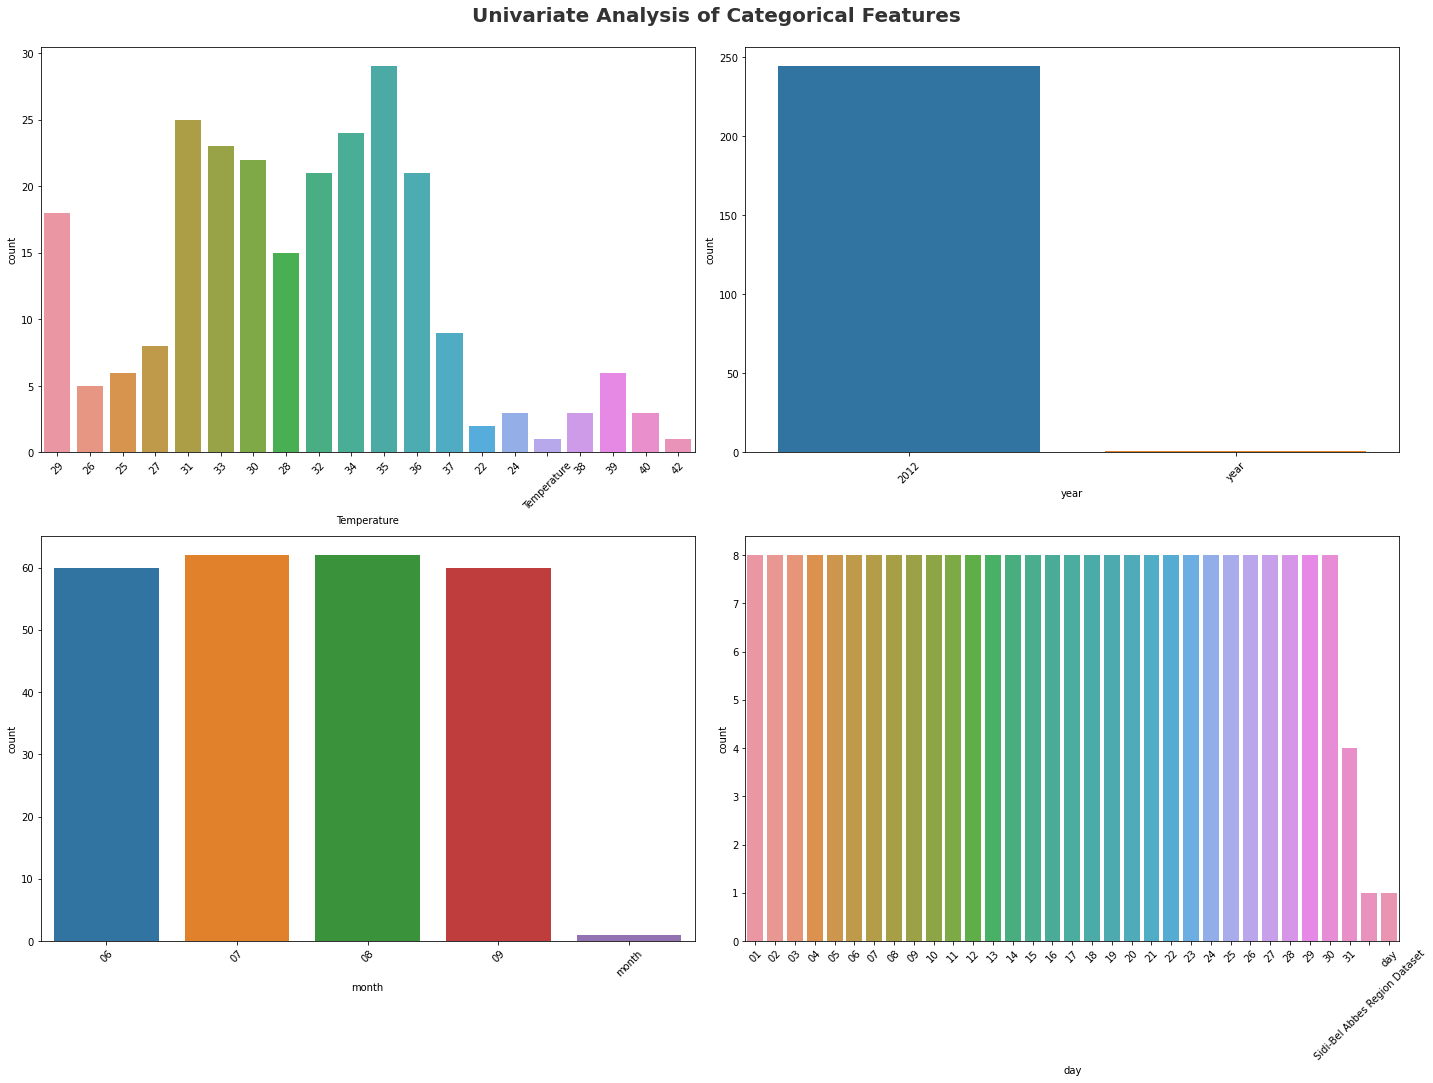

In [9]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Temperature','year','month','day']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**observations:**
* Temperature feature above shows the highest reached temperature was around 30.
* The day feature graph shows almost the whole month the count remained the same.
* year also in 2012 analysis has taken place as clearly shown in the graph.

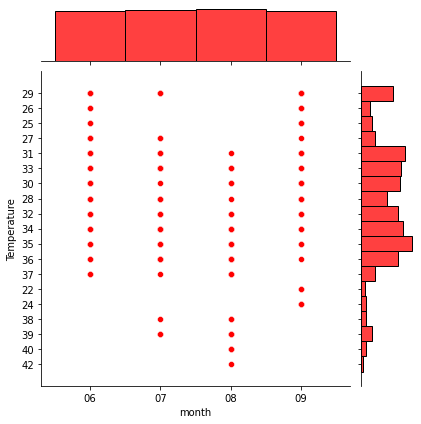

In [140]:
sns.jointplot(x='month',y='Temperature',data=df2,color='r')

#### observation:
* The above plot displays a scatterplot with two histograms at the margins of the graph.
* The highest Temperature observed was on August month which has 42F according to the above graph.
* The strength of the relationship appears to be stable because the points are restricted in the graph. 
* By seeing the marginal histograms, we can conclude that there are very minimal number of outliers w.r.t the features in consideration.

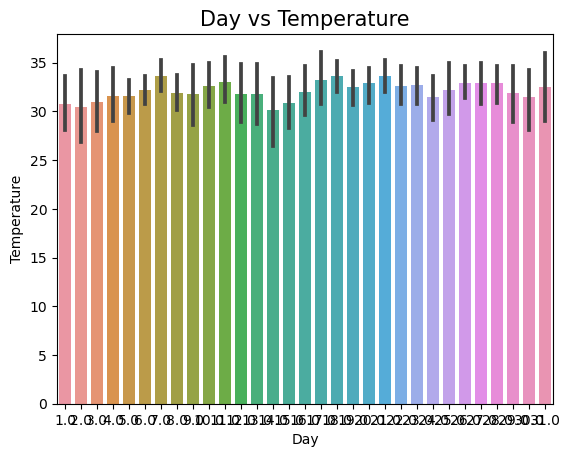

In [165]:
#Barplot

plt.style.use("default")
sns.barplot(x='day', y='Temperature',data=df2)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

#### observations:
* Temperature is shown on the Y-axis with respect to each and every day of a month on X-axis
* In the date 17th and 31st of the month the temperature is at its peak.
* But huge variation of the temperature is not there in this month.

In [163]:
#converting temperature values to float values which is helpful in analysing the relationship between the variables.
df2 = df2.explode('Temperature')
df2['Temperature'] = df2['Temperature'].astype('float')


#### violin plot
A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

<AxesSubplot:xlabel='day', ylabel='Temperature'>

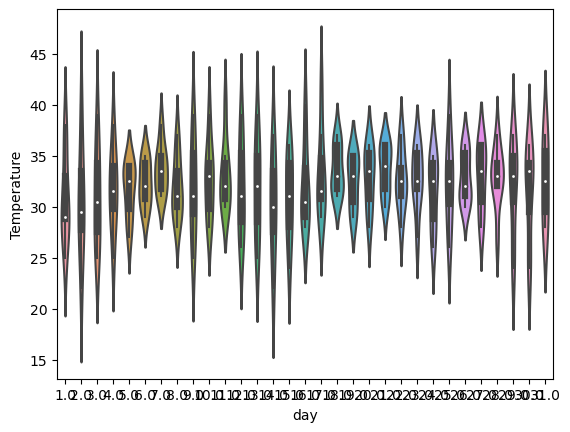

In [164]:
sns.violinplot(data=df2, x='day', y='Temperature')

#### observation:
* The maximum temperature above 45deg Celsius is seen on 17th and 2nd of the month which is considered for the correlation.
* And also in the same day huge temperature variation can be seen on 2nd of the month as you can see above graph.

#### Pairplot
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

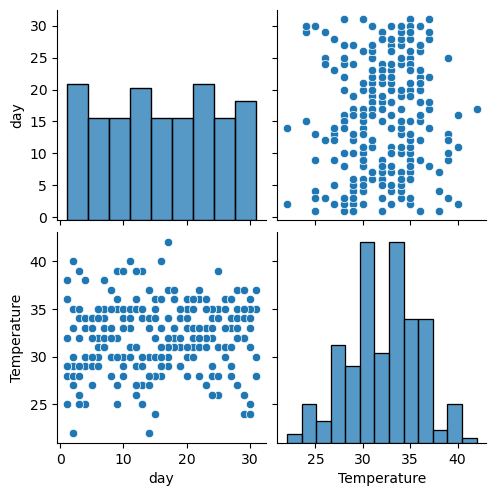

In [166]:
sns.pairplot(df2)

#### observations:
* Normal distribution of temperature can be seen in above histogram
* And by also seeing the scattered plot we can say that the temperature variation is very minimal as the points are equally scattered.


#### Line plot
A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value. 

<AxesSubplot:xlabel='Temperature', ylabel='day'>

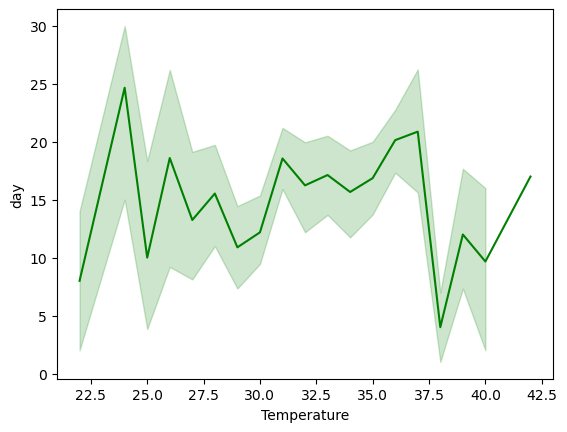

In [167]:
sns.lineplot(x='Temperature',y='day',data=df2,color='g')

#### observations:
* Very low temperature at the end of the month
* Very high temperature at the beginning of the month
* Moderate temperature at the middle of the month

#### Histogram
A histogram is a display of statistical information that uses rectangles to show the frequency of data items in successive numerical intervals of equal size.

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

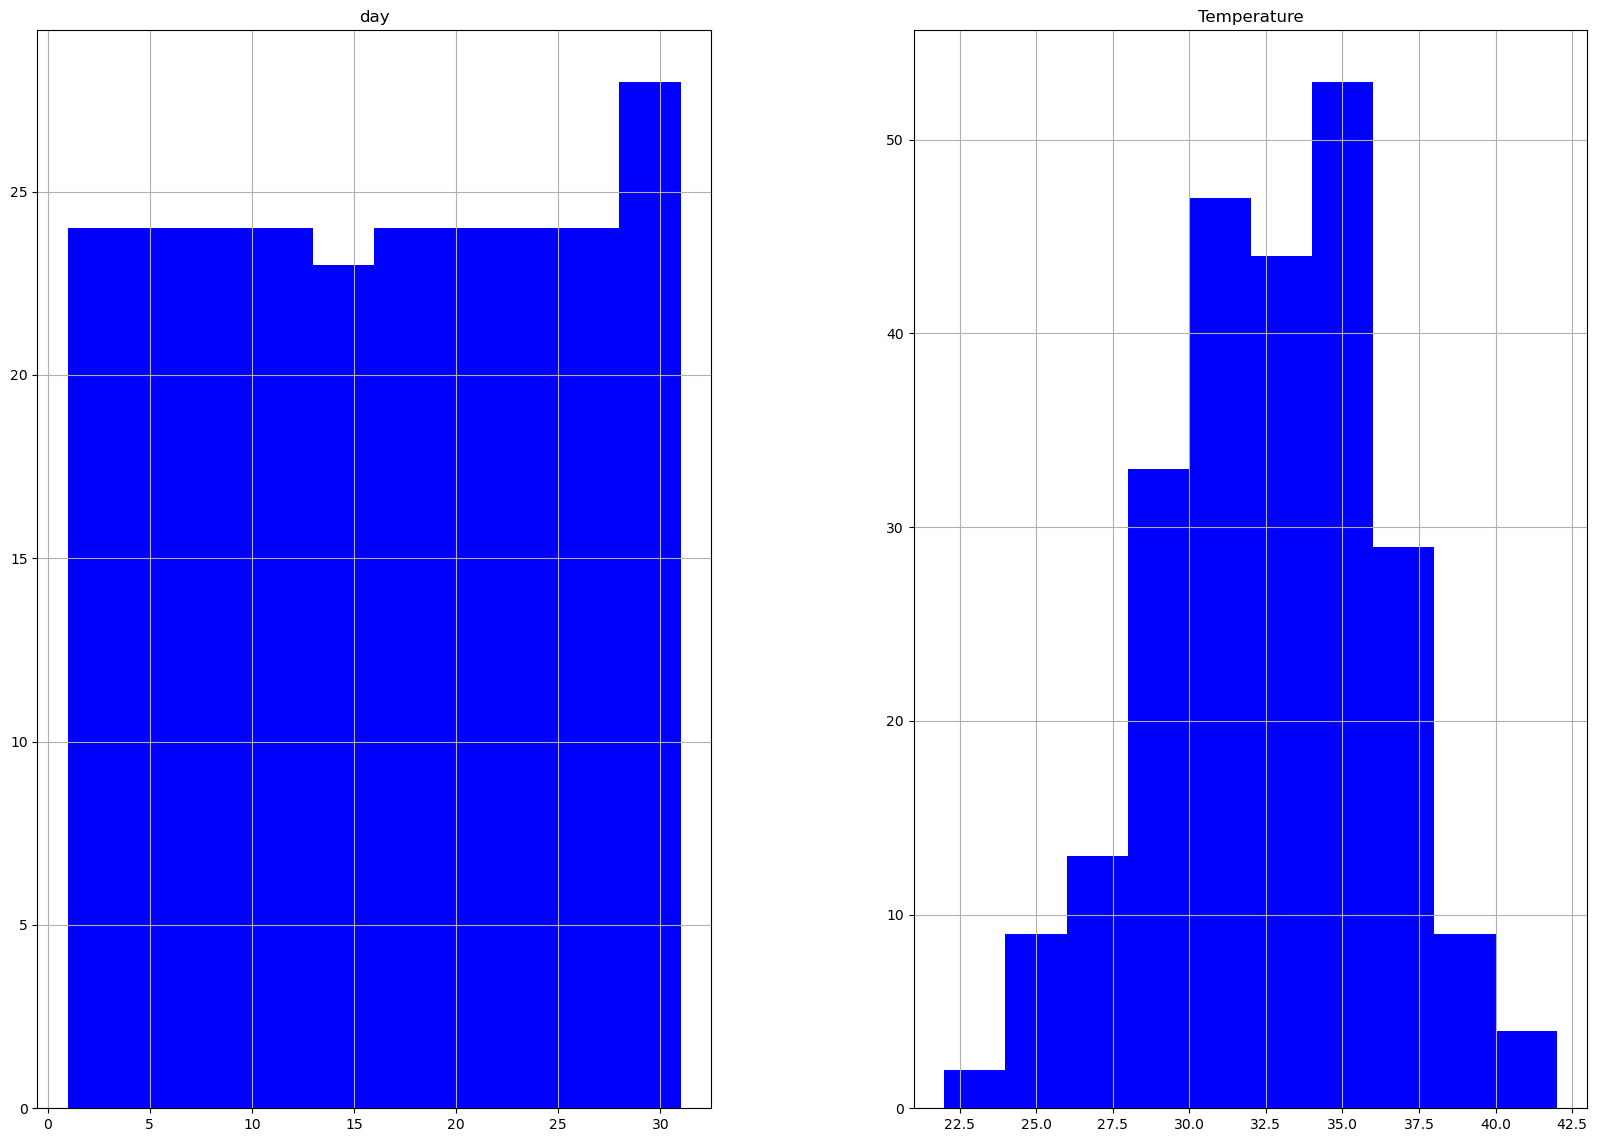

In [168]:
df2.hist(figsize=(20,14),color='b')

#### observations:
* First plot is just a day distribution in a month
* second plot/histogram as we can see temperature is normally distributed throughout the month

#### Heatmap
A histogram is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

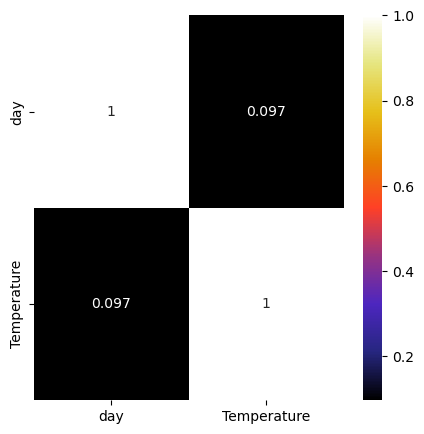

In [172]:
plt.figure(figsize = (5,5))
sns.heatmap(df2.corr(), cmap="CMRmap", annot=True)
plt.show()

#### observations;
* There is no negative impact of the temperature of all the days in a month which is considered.
* Each square shows the correlation between the variables on each axis. 
* Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.
* The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
* A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
* The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). 

In [58]:
# Percentage for PieChart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

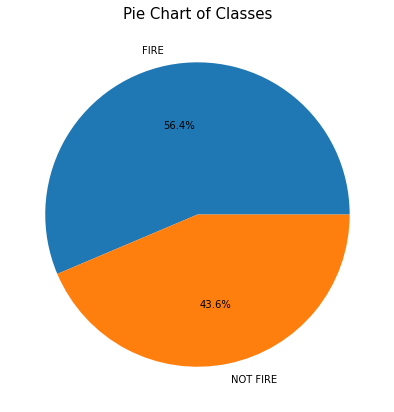

In [59]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

## Linear Regression
In order to predict the Temperature with respect to different features of the dataset

In [60]:
X = df1.iloc[:, 0:13]
y = df1['Classes']

In [61]:
X.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [40]:
y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 246, dtype: object

In [62]:
#Droping features ['day','month','year'] beacuse it is not important for analysis 
df2 = df1.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [148]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [78]:
X_train

array([[ 0.19763619,  1.34865164,  0.        , ...,  0.89709937,
         0.7278858 ,  1.0048957 ],
       [-1.13870263,  1.34865164,  0.        , ..., -0.91779112,
        -0.93868129, -0.91743998],
       [-1.47278733,  0.44624503,  0.        , ...,  2.75736213,
        -0.03455178,  1.53033412],
       ...,
       [ 1.08852874,  1.34865164,  0.        , ..., -0.57749915,
        -0.75650594, -0.75083756],
       [ 0.19763619, -0.45616158,  0.        , ..., -0.1010904 ,
        -0.21672713, -0.199768  ],
       [ 0.64308246, -0.45616158,  0.        , ...,  1.84991688,
         1.79394897,  2.28645282]])

In [65]:
y_train

230    1
218    0
184    1
233    1
204    1
144    0
16     0
89     1
212    1
74     1
4      0
108    1
61     0
116    0
52     0
66     1
26     1
97     0
92     0
229    1
40     0
13     0
3      0
137    0
24     1
30     0
217    0
60     1
56     1
182    0
126    0
19     0
181    1
191    1
54     1
194    1
80     1
51     0
158    1
166    1
125    0
86     1
129    0
136    0
242    0
124    0
41     0
14     0
27     1
50     1
220    1
20     1
161    0
46     1
219    1
238    1
139    0
171    1
62     0
178    1
2      0
59     1
202    1
226    1
43     0
190    1
10     1
138    0
153    1
112    1
176    0
98     0
152    0
93     0
149    1
232    0
113    0
0      0
94     0
95     0
69     1
49     1
48     1
85     1
240    0
141    0
23     1
214    0
143    0
78     1
100    0
131    1
237    0
241    0
6      1
68     0
84     1
121    0
227    1
189    1
206    1
201    1
196    1
91     0
207    1
11     1
119    0
102    0
35     1
57     1
169    1
6

In [66]:
X_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
110,19,9,2012,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7
150,29,6,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2
37,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0
75,15,8,2012,36,55,13,0.3,82.4,15.6,92.5,3.7,22.0,6.3
109,18,9,2012,32,49,11,0.0,89.4,9.8,33.1,6.8,11.3,7.7
71,11,8,2012,35,63,13,0.0,88.9,21.7,77.0,7.1,25.5,12.1
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
73,13,8,2012,35,63,15,0.0,87.0,19.0,85.1,5.9,24.4,10.2
154,3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2
234,22,9,2012,33,64,13,0.0,88.9,26.1,106.3,7.1,32.4,13.7


In [67]:
y_test

110    1
150    1
37     1
75     1
109    1
71     1
122    0
73     1
154    1
234    1
223    0
180    1
157    1
156    1
188    0
135    0
187    0
130    0
224    1
8      0
200    1
145    1
90     0
123    0
5      1
22     1
168    1
222    0
12     0
236    0
55     1
44     0
101    0
83     1
118    1
63     0
162    0
173    1
205    1
134    0
146    1
45     0
106    0
18     0
107    0
15     0
76     1
7      1
213    0
209    0
64     1
155    1
104    0
96     1
111    1
33     0
179    1
160    1
159    1
170    1
221    1
Name: Classes, dtype: int32

In [79]:
X_train.shape, X_test.shape

((182, 13), (61, 13))

In [89]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [82]:
X_train.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [83]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.012548,NaN,0.064643,-0.026017,0.064744,-0.096895,0.200917,0.475293,0.518656,0.136345,0.505941,0.323557
month,-0.012548,1.000000,NaN,-0.038849,-0.078540,0.031898,0.047124,0.017551,0.082367,0.121087,0.082006,0.093368,0.097279
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.064643,-0.038849,NaN,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.026017,-0.078540,NaN,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,0.064744,0.031898,NaN,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.096895,0.047124,NaN,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.200917,0.017551,NaN,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.475293,0.082367,NaN,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.518656,0.121087,NaN,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551


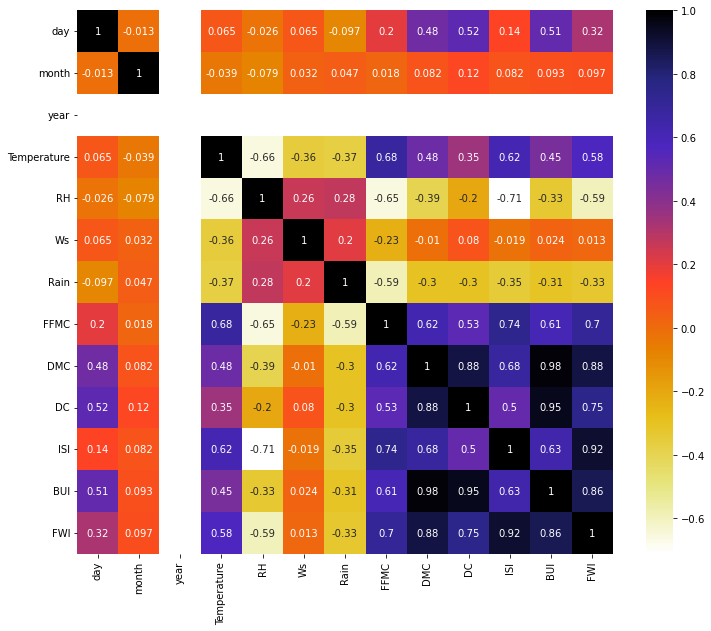

In [85]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [86]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [87]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

These three features are there which has correlation more than 0.8 so we will remove it

In [90]:
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 10), (61, 10))

## Standardize or feature scaling the dataset

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
scaler

StandardScaler()

In [72]:
X_train=scaler.fit_transform(X_train)

In [73]:
X_test=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

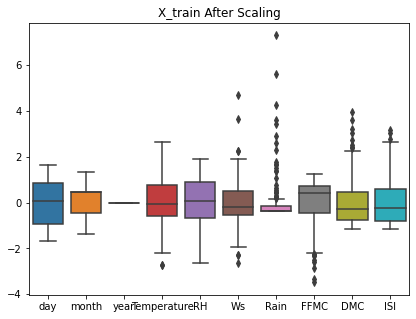

In [94]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train After Scaling')

## Classification

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [96]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [97]:
X = df2.iloc[:, 0:10]
y = df2['Classes']

In [98]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [99]:
y

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      0
9      0
10     1
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     0
34     1
35     1
36     0
37     1
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     1
47     1
48     1
49     1
50     1
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     0
62     0
63     0
64     1
65     1
66     1
67     1
68     0
69     1
70     1
71     1
72     0
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    1
109    1
110    1
1

In [100]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((170, 10), (73, 10))

In [101]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [102]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [103]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [106]:
scaler

StandardScaler()

**Logistic Regression**

In [107]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

In [108]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [-0.58988894]
Coefficient is : [[-0.25854037 -0.00420745 -0.30473948 -0.09108011  0.06801983  0.10338869
   2.37980019]]


In [109]:
print("Training Score:",Logistic_Regression.score(X_train, y_train))
print("Test Score:",Logistic_Regression.score(X_test,y_test))

Training Score: 0.9823529411764705
Test Score: 0.9178082191780822


In [110]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test)
Logistic_Regression_Prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [111]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Logistic_Regression_Prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [112]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.97      0.88      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.92      0.92      0.92        73



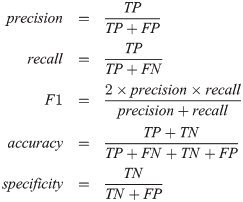

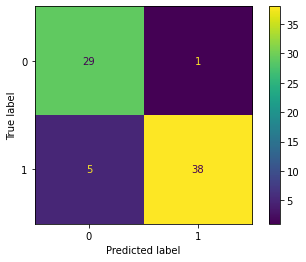

In [113]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test, y_test)
Logistic_Regression_Confusion_Matrix